In [38]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [39]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [40]:
!unzip /content/gdrive/MyDrive/archive.zip

Archive:  /content/gdrive/MyDrive/archive.zip
replace human-and-non-human/test_set/test_set/humans/AJ_Lamas_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [5]:
Batch_size=200
Img_shape=250

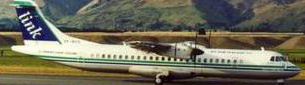

In [6]:
import pathlib
img=tf.keras.preprocessing.image.load_img('/content/humnon/training_set/training_set/non-humans/airplane_0005.jpg')
img

In [7]:
import pathlib
train_dir=pathlib.Path('/content/humnon/training_set/training_set/')
val_dir=pathlib.Path('/content/humnon/test_set/test_set/')

In [8]:
data_gen=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=40,zoom_range=0.5)
train_data_gen=data_gen.flow_from_directory(
    batch_size=Batch_size,
    directory=train_dir,
    shuffle=True,
    target_size=(Img_shape,Img_shape),
    class_mode="binary"
)

Found 8017 images belonging to 2 classes.


In [9]:
data_gen=ImageDataGenerator(rescale=1./255)
val_data_gen=data_gen.flow_from_directory(
    batch_size=Batch_size,
    directory=val_dir,
    target_size=(Img_shape,Img_shape),
    class_mode="binary"
)

Found 2723 images belonging to 2 classes.


In [10]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

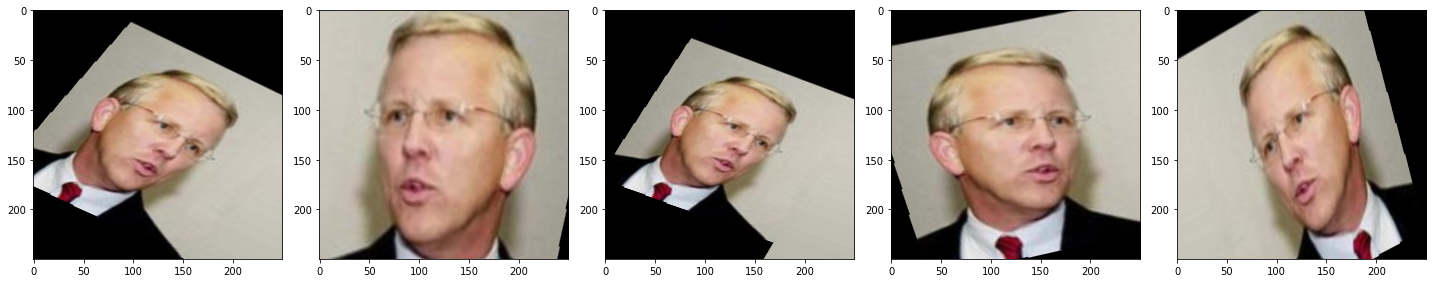

In [11]:
aug_img=[train_data_gen[0][0][0] for i in range(5)]
plotImages(aug_img)

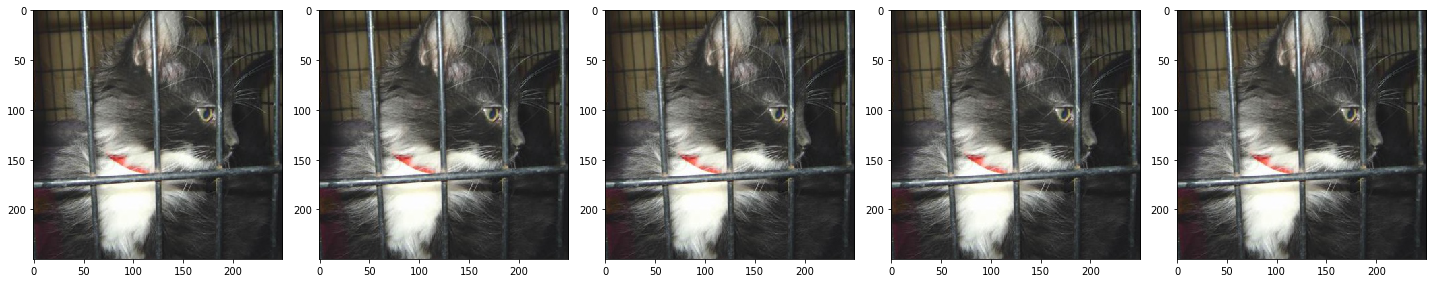

In [12]:
aug_img=[val_data_gen[0][0][0] for i in range(5)]
plotImages(aug_img)

In [14]:
model=tf.keras.models.Sequential(layers=[
        tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=(3,3),activation='relu',input_shape=(Img_shape,Img_shape,3)),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512,activation='softmax'),
        tf.keras.layers.Dense(units=2)
])

In [15]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
epochs = 10
import numpy as np
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(Batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(Batch_size)))
)

Epoch 1/10
41/41 [==============================] - 125s 3s/step - loss: 0.6196 - accuracy: 0.8360 - val_loss: 0.5766 - val_accuracy: 0.9486
Epoch 2/10
41/41 [==============================] - 115s 3s/step - loss: 0.5547 - accuracy: 0.9543 - val_loss: 0.5636 - val_accuracy: 0.8814
Epoch 3/10
41/41 [==============================] - 115s 3s/step - loss: 0.5225 - accuracy: 0.9469 - val_loss: 0.5099 - val_accuracy: 0.9423
Epoch 4/10
41/41 [==============================] - 114s 3s/step - loss: 0.4871 - accuracy: 0.9607 - val_loss: 0.5021 - val_accuracy: 0.9067
Epoch 5/10
41/41 [==============================] - 114s 3s/step - loss: 0.4777 - accuracy: 0.9311 - val_loss: 0.4903 - val_accuracy: 0.8939
Epoch 6/10
41/41 [==============================] - 114s 3s/step - loss: 0.4400 - accuracy: 0.9558 - val_loss: 0.5017 - val_accuracy: 0.8542
Epoch 7/10
41/41 [==============================] - 115s 3s/step - loss: 0.4216 - accuracy: 0.9516 - val_loss: 0.4055 - val_accuracy: 0.9607
Epoch 8/10
41

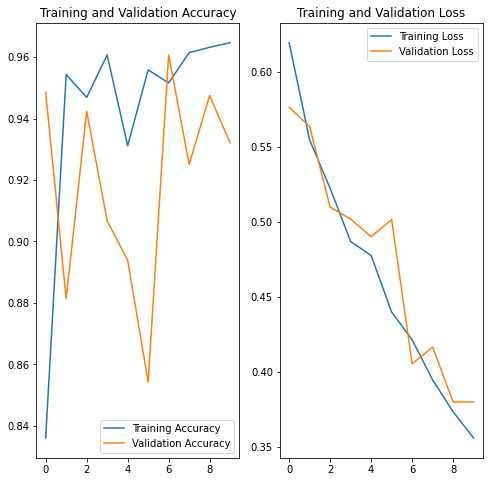

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

[[149.12712   49.571575]]


'Human'

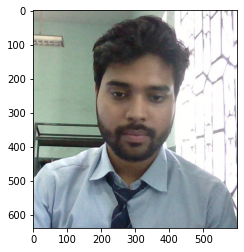

In [61]:
class_names=["Human","Not Human"]
import PIL
from skimage import transform
img=PIL.Image.open(r"/content/hum17.jpg")
plt.imshow(X=img)
img=np.array(img).astype('float32')/255
img=transform.resize(img,(250,250,3))
img=np.expand_dims(img,axis=0)
predictions=model.predict(img)
print((predictions+1)*100)
class_names[np.argmax(a=predictions)]

In [28]:
model.save('version_1.h5')

In [31]:
!cd /content/
!ls -l


total 740412
drwx------ 5 root root      4096 Mar 30 07:05 gdrive
-rw-r--r-- 1 root root     40671 Mar 30 07:36 ht.jpeg
-rw-r--r-- 1 root root    177338 Mar 30 05:55 hum1.jpg
-rw-r--r-- 1 root root    180455 Mar 30 05:55 hum2.jpg
-rw-r--r-- 1 root root    180242 Mar 30 05:55 hum3.jpg
-rw-r--r-- 1 root root    180394 Mar 30 05:55 hum4.jpg
-rw-r--r-- 1 root root    181360 Mar 30 05:55 hum5.jpg
-rw-r--r-- 1 root root     48013 Mar 30 06:12 hum6.jpg
-rw-r--r-- 1 root root    200127 Mar 30 07:35 hum7.jpg
drwxr-xr-x 4 root root      4096 Mar 30 07:06 human-and-non-human
drwxr-xr-x 4 root root      4096 Mar 30 05:39 humnon
drwxr-xr-x 1 root root      4096 Mar 23 14:22 sample_data
-rw-r--r-- 1 root root 756952592 Mar 30 07:37 version_1.h5
